Initial Data:
   CustomerID  Gender  Tenure  MonthlyCharges  TotalCharges  Churn
0           1       1      12            20.5         250.0      0
1           2       0      24            35.8         800.5      1
2           3       0      36            40.2        1400.2      0
3           4       1      48            55.1        2600.8      0
4           5       0      60            60.9        4000.5      1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12208\3434472914.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette='coolwarm')


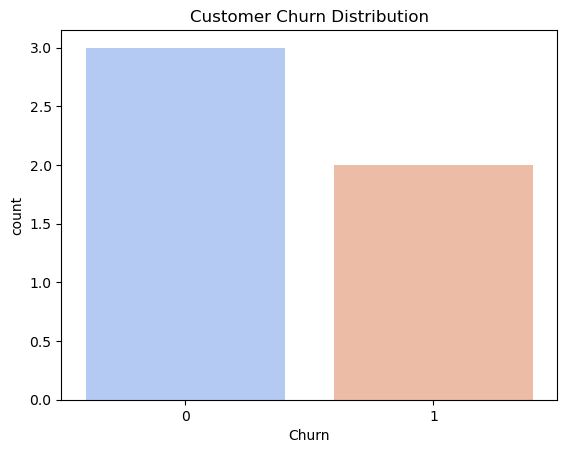

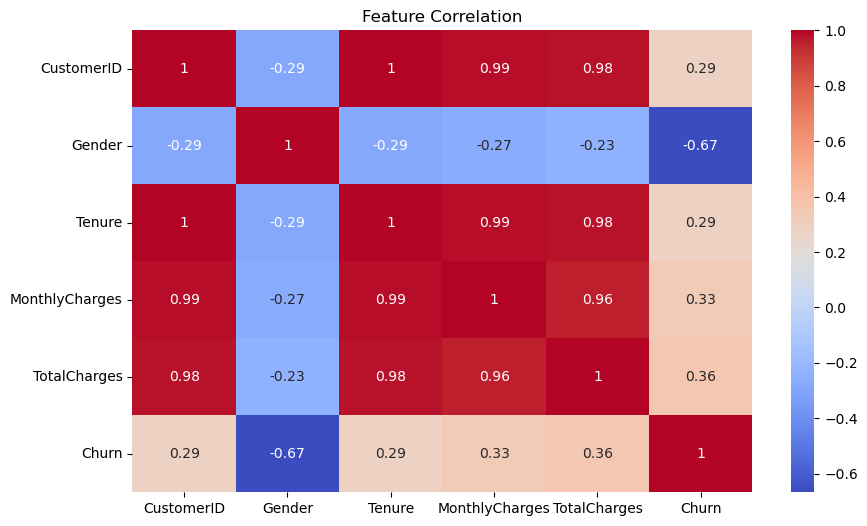

,0,1,2,3
count,5.00,5.00,5.00,5.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.12,1.12,1.12,1.12
min,-1.41,-1.53,-1.16,-0.82
25%,-0.71,-0.47,-0.75,-0.82
50%,0.00,-0.16,-0.30,-0.82
75%,0.71,0.88,0.59,1.22
max,1.41,1.28,1.63,1.22


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Sample Customer Churn Data
data = {
    "CustomerID": [1, 2, 3, 4, 5],
    "Gender": ["Male", "Female", "Female", "Male", "Female"],
    "Tenure": [12, 24, 36, 48, 60],
    "MonthlyCharges": [20.5, 35.8, 40.2, 55.1, 60.9],
    "TotalCharges": [250.0, 800.5, 1400.2, 2600.8, 4000.5],
    "Churn": ["No", "Yes", "No", "No", "Yes"]
}

# Create DataFrame
df = pd.DataFrame(data)


# Save as CSV
df.to_csv("D://pandas//customer_churn.csv", index=False)


# Load Dataset
df = pd.read_csv("D://pandas//customer_churn.csv")
print("Initial Data:")
df.head()

# Handle Missing Values
df.fillna(0, inplace=True)

# Convert Categorical Variables
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])\

print(df.head())#converted data in numerical 


# Exploratory Data Analysis (EDA)
sns.countplot(x="Churn", data=df, palette='coolwarm')
plt.title("Customer Churn Distribution")
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Feature Engineering
X = df[['Tenure', 'MonthlyCharges', 'TotalCharges', 'Gender']]
y = df['Churn']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
xscaled=pd.DataFrame(X_scaled)
np.round(xscaled.describe(),2)



In [14]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s